In [93]:
from PIL import Image

# from IPython.display import display, HTML
# display(HTML(
# """
# <a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb">
#   <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
# </a>
# """
# ))


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from pycocotools import mask as mask_utils

In [47]:
def display_binary_mask(binary_mask):
    fig, ax = plt.subplots()
    ax.imshow(binary_mask, cmap='gray')
    ax.axis('off')
    plt.show(block=False)
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cu117
True


In [115]:
def show_anns(anns, image):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    image_copy = np.copy(image)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    
    image_copy = np.concatenate((image_copy, np.ones((image_copy.shape[0], image_copy.shape[1], 1), dtype=np.uint8) * 0), axis=2)

    for ann in [sorted_anns[0]]:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
        
        # alpha_channel = np.full((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 1), 0, dtype=np.uint8)
        # image_copy = np.concatenate((image_copy, alpha_channel), axis=2)
        
        m = ann['segmentation']
        n = ~m
        
        color_mask = np.concatenate([np.random.random(3), [.35]])
        img[m] = color_mask
        
        img[m] = [0, 0, 0, 255]
        display_binary_mask(m)
        display_binary_mask(n)
        
        
        
        for i in range(sorted_anns[0]['segmentation'].shape[0]):
            for j in range(sorted_anns[0]['segmentation'].shape[1]):
                if n[i][j]:
                    image_copy[i][j][0] = image[i][j][0]
                    image_copy[i][j][1] = image[i][j][1]
                    image_copy[i][j][2] = image[i][j][2]
                    image_copy[i][j][3] = 255
                else:
                    image_copy[i][j][0] = 0
                    image_copy[i][j][1] = 0
                    image_copy[i][j][2] = 0
        
    
        

    # Convert the array to PIL Image
    image_copy = Image.fromarray(image_copy, 'RGBA')
    
    image_copy.save('/segment-anything/cropped_images/sample5_cropped.png')
    return image_copy

       

In [116]:
image = cv2.imread('/segment-anything/test_images/sample5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [117]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

In [118]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(image)

print(len(masks))

21


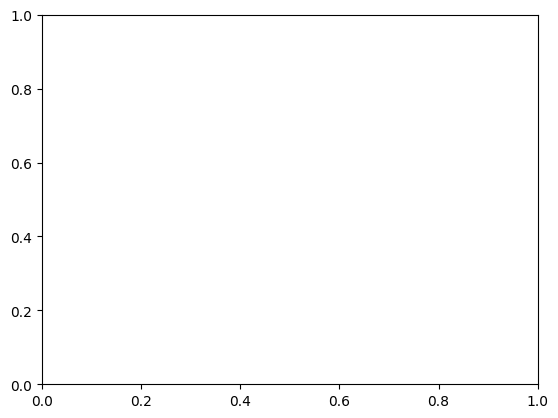

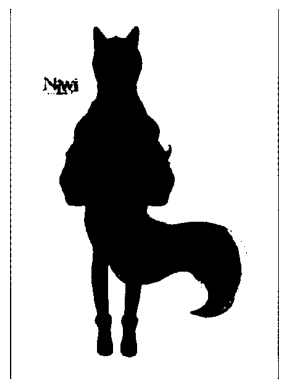

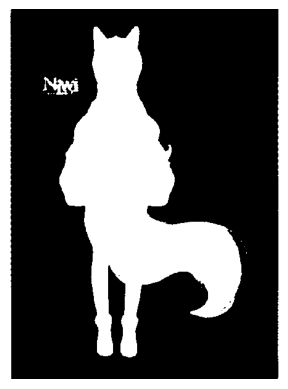

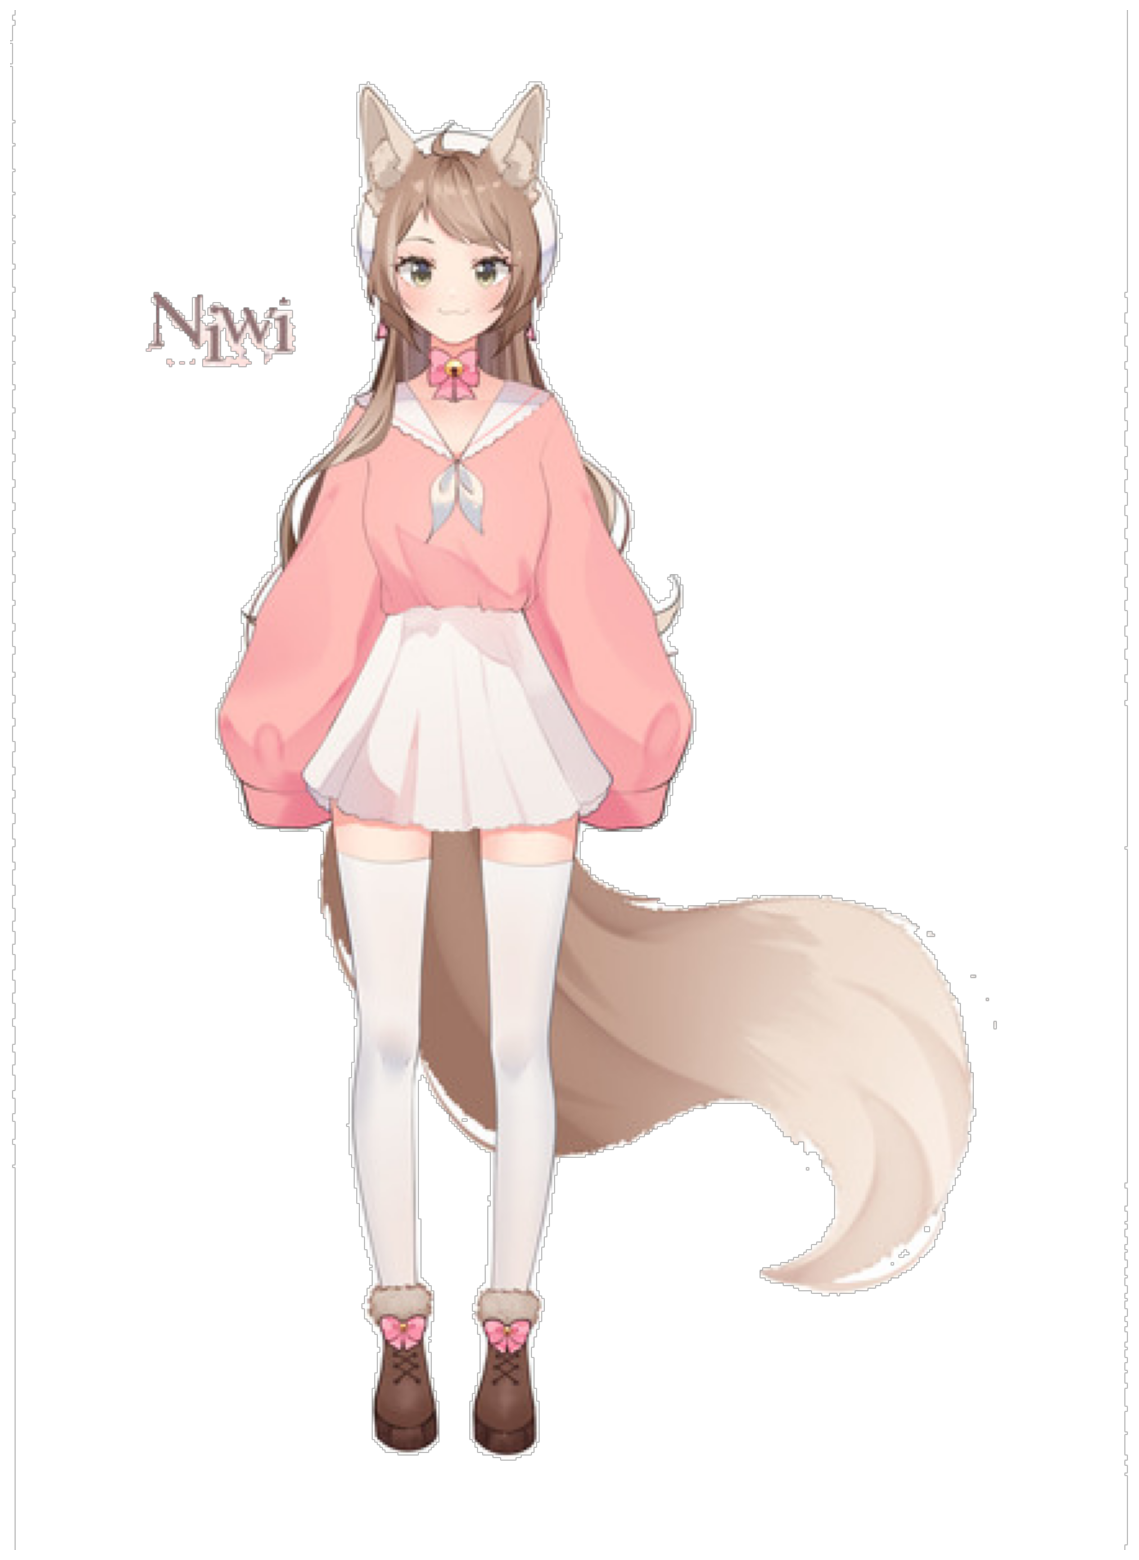

In [119]:


#plt.imshow(image)
image_copy = show_anns(masks, image)
plt.figure(figsize=(20,20))
plt.imshow(image_copy)
plt.axis('off')
plt.show()
